#                           Automatic Text Generator using LSTM

Automatic text generation has numerous applications in different sectors and fields of the world.Thus,we are trying to implement the "Automatic Text Generator" using LSTM model.LSTM stands for Long Short-term Memory networks.They can sustain the information for long period of times and hence they are being used in multi-class classification problems.Thus, because of its advantages we have decided to implement Automatic Text Generator using LSTM networks. 

Moreover,Embedding of the input text data plays vital role in this project.So, we decided to go with two approaches and compare them.We have used the keras preprocessing library and the word2vec methods of embedding.Thus, the pipeline of our entire project will go as shown in the figure below:

## Overall Pipline of our project

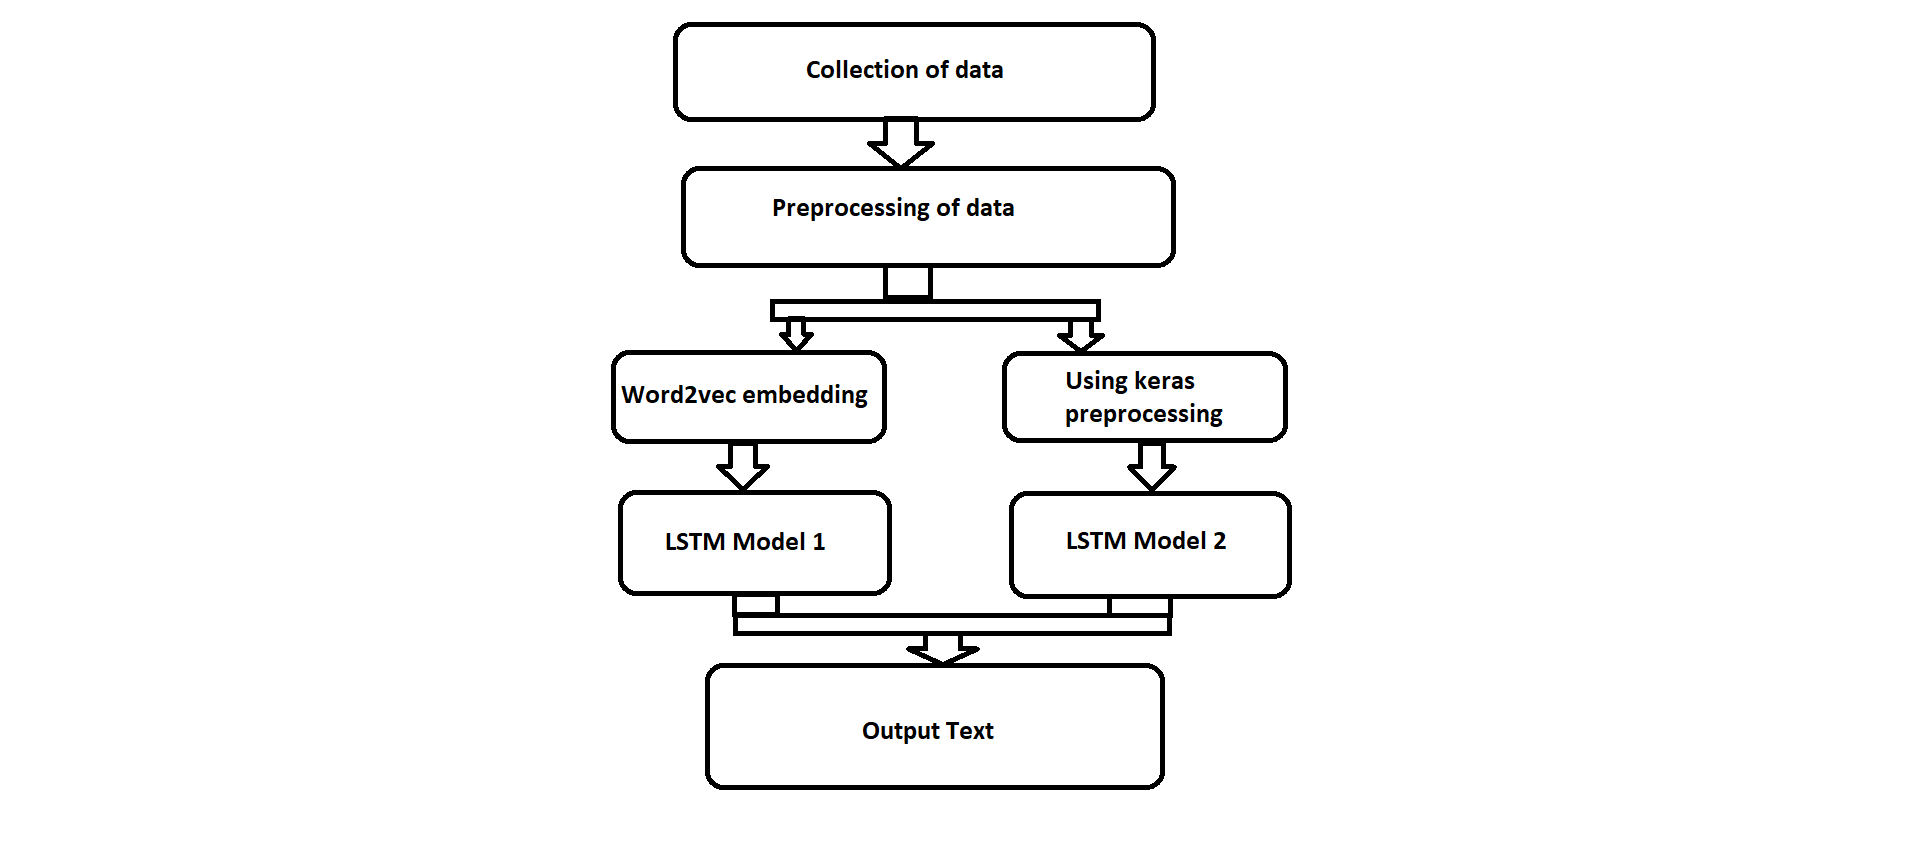

# 1. Collection of Data

The first step will involve the collectiion of data.We have choosen a book named " Educating by Story-Telling-Showing the Value of Story-Telling as an Educational Tool for the Use of All Workers with Children" by the author "Katherine
Dunlap Cather". The total number of words of actual story in this book are 107518 .So the data is sufficiently large so that it well get sufficient amount of words to train on.

### Importing necessary libraries 

Importing string library so that we can remove all the punctuations from our text data.

Importing requests to use get function to load our data from url. 

In [1]:
import string
import requests

In [2]:
response=requests.get('https://www.gutenberg.org/files/58255/58255-0.txt')

In [3]:
response.text

'ï»¿The Project Gutenberg eBook, Educating by Story-Telling, by Katherine\r\nDunlap Cather\r\n\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and most\r\nother parts of the world at no cost and with almost no restrictions \r\nwhatsoever.  You may copy it, give it away or re-use it under the terms of\r\nthe Project Gutenberg License included with this eBook or online at \r\nwww.gutenberg.org.  If you are not located in the United States, you\'ll have\r\nto check the laws of the country where you are located before using this ebook.\r\n\r\n\r\n\r\n\r\nTitle: Educating by Story-Telling\r\n       Showing the Value of Story-Telling as an Educational Tool for the Use of All Workers with Children\r\n\r\n\r\nAuthor: Katherine Dunlap Cather\r\n\r\n\r\n\r\nRelease Date: November 9, 2018  [eBook #58255]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\n\r\n***START OF THE PROJECT GUTENBERG EBOOK EDUCATING BY STORY-TELLING***\r\n\r\n\r\nE-text prepared 

Now this is our text read from the book.Since it needs to be cleaned properly so that we can give that cleaned text as the 
input to our model, some preproceesing steps needs to be performed.Following steps needs to be followed for preprocessing. 

# 2. Data Preprocessing 

We can observe that in our loaded text \r\n is present after every line. So to remove \r\n we have splitted our text by using .split() function.\n stands for the new line character and \r  is carriage return that takes the cursor to the very beginning of the current line.These are used for printing text which does not hold any value when training our data.So this needs to be eliminated first. 

In [4]:
data=response.text.split('\r\n')
data

['ï»¿The Project Gutenberg eBook, Educating by Story-Telling, by Katherine',
 'Dunlap Cather',
 '',
 '',
 'This eBook is for the use of anyone anywhere in the United States and most',
 'other parts of the world at no cost and with almost no restrictions ',
 'whatsoever.  You may copy it, give it away or re-use it under the terms of',
 'the Project Gutenberg License included with this eBook or online at ',
 "www.gutenberg.org.  If you are not located in the United States, you'll have",
 'to check the laws of the country where you are located before using this ebook.',
 '',
 '',
 '',
 '',
 'Title: Educating by Story-Telling',
 '       Showing the Value of Story-Telling as an Educational Tool for the Use of All Workers with Children',
 '',
 '',
 'Author: Katherine Dunlap Cather',
 '',
 '',
 '',
 'Release Date: November 9, 2018  [eBook #58255]',
 '',
 'Language: English',
 '',
 'Character set encoding: UTF-8',
 '',
 '',
 '***START OF THE PROJECT GUTENBERG EBOOK EDUCATING BY STORY-TELLING**

Now our actual story is begins at line number 385 and ends at 11418. Hence by using slicing technique we have sliced our data set accordingly. 

In [5]:
data[385]

'The story is a phase of communicationâ\x80\x94the instinctive tendency to signal'

In [6]:
data[11418]

'And this is what he said.'

In [7]:
data[-5000:-1]

['â\x80\x9cHe must be here,â\x80\x9d he insisted, â\x80\x9cfor so sang the angels at BÃªt SahÃ»r,',
 'saying, â\x80\x98In the city of David,â\x80\x99 which is Bethlehem.â\x80\x9d',
 '',
 'Whereupon some of the guardsmen smiled and pointed to their heads, and',
 'some laughed jeeringly.',
 '',
 'There was one, however, a tall, gentle-faced archer, who smiled and spoke',
 'kindly, â\x80\x9cThey say a man child has come to the stable beyond the khan,',
 'where Joseph ben David the Nazarene and his wife have taken shelter. You',
 'might try there.â\x80\x9d',
 '',
 'The shepherd nodded and thanked him, his dark eyes moistly tender and in',
 'his face a light that silenced the mockers.',
 '',
 'â\x80\x9cThither will I go,â\x80\x9d he exclaimed, and hurried on his way, bowing his',
 'head reverently as he came in sight of the place.',
 '',
 'Now it happened when Ben Ezra reached the stable where Joseph ben David',
 'was abiding because of the multitude in the khan, that he found the Child',
 

In [8]:
data=data[385:11418]

So now we have got our actual text which is splitted by \r\n. So by using .join() function we have joined each line of our splitted data.

In [9]:
data=" ".join(data)

In [10]:
data

'The story is a phase of communicationâ\x80\x94the instinctive tendency to signal and transmit feelings and ideas and to respond to such expressionsâ\x80\x94and communication is associated with the social complex of instincts and emotions as indicated by these responses. Through the power of social sympathy in this complex, curiosity and the imagination are brought under the sway of communication, especially in the story. Indeed, the psychology of the story reveals how deeply social sympathy influences the imagination and controls curiosity. The primitive side of this social sympathy is seen in the responses of social animals to the calls of their kind, in the rush of dogs and men to the cries of battle. Its power over the imagination is shown in the swaying of the spectator to the movements of the athlete, his ejaculations and his cries of distress or delight. Through sympathy in imagination the spectator enters the contest. Further, so socially minded are we, and so dependent upon so

To do further processing we need to have a list of each separate word and it is done by using Regular Expression(re) findall function. This function returns first matching pattern.So have done this by  using w+ expression in regex which is used for matching the alpha numeric character.

In [11]:
import re
res = re.findall(r'\w+', data)
f=res[:50]  #these are first 50 words from our list
f

['The',
 'story',
 'is',
 'a',
 'phase',
 'of',
 'communicationâ',
 'the',
 'instinctive',
 'tendency',
 'to',
 'signal',
 'and',
 'transmit',
 'feelings',
 'and',
 'ideas',
 'and',
 'to',
 'respond',
 'to',
 'such',
 'expressionsâ',
 'and',
 'communication',
 'is',
 'associated',
 'with',
 'the',
 'social',
 'complex',
 'of',
 'instincts',
 'and',
 'emotions',
 'as',
 'indicated',
 'by',
 'these',
 'responses',
 'Through',
 'the',
 'power',
 'of',
 'social',
 'sympathy',
 'in',
 'this',
 'complex',
 'curiosity']

In [12]:
len(res)

107518

Thus,our model will be trained on 107518 number of words.

In the list named final we have all our words which are present in our data. So now we need to remove all other words which are not alphabates to do so we have used .isalpha() function.

In [13]:
final=[]
for i in res:
    if i.isalpha():
        final.append(i)        
final

['The',
 'story',
 'is',
 'a',
 'phase',
 'of',
 'communicationâ',
 'the',
 'instinctive',
 'tendency',
 'to',
 'signal',
 'and',
 'transmit',
 'feelings',
 'and',
 'ideas',
 'and',
 'to',
 'respond',
 'to',
 'such',
 'expressionsâ',
 'and',
 'communication',
 'is',
 'associated',
 'with',
 'the',
 'social',
 'complex',
 'of',
 'instincts',
 'and',
 'emotions',
 'as',
 'indicated',
 'by',
 'these',
 'responses',
 'Through',
 'the',
 'power',
 'of',
 'social',
 'sympathy',
 'in',
 'this',
 'complex',
 'curiosity',
 'and',
 'the',
 'imagination',
 'are',
 'brought',
 'under',
 'the',
 'sway',
 'of',
 'communication',
 'especially',
 'in',
 'the',
 'story',
 'Indeed',
 'the',
 'psychology',
 'of',
 'the',
 'story',
 'reveals',
 'how',
 'deeply',
 'social',
 'sympathy',
 'influences',
 'the',
 'imagination',
 'and',
 'controls',
 'curiosity',
 'The',
 'primitive',
 'side',
 'of',
 'this',
 'social',
 'sympathy',
 'is',
 'seen',
 'in',
 'the',
 'responses',
 'of',
 'social',
 'animals',
 't

Now, the next important step is to convert all words  from our corpus into lower case by using .lower() function.This is done so that the words with the same meaning but case difference should not be represented as 2 different words in vector space model.

In [14]:
for i in range(len(final)):
        final[i] = final[i].lower()
final

['the',
 'story',
 'is',
 'a',
 'phase',
 'of',
 'communicationâ',
 'the',
 'instinctive',
 'tendency',
 'to',
 'signal',
 'and',
 'transmit',
 'feelings',
 'and',
 'ideas',
 'and',
 'to',
 'respond',
 'to',
 'such',
 'expressionsâ',
 'and',
 'communication',
 'is',
 'associated',
 'with',
 'the',
 'social',
 'complex',
 'of',
 'instincts',
 'and',
 'emotions',
 'as',
 'indicated',
 'by',
 'these',
 'responses',
 'through',
 'the',
 'power',
 'of',
 'social',
 'sympathy',
 'in',
 'this',
 'complex',
 'curiosity',
 'and',
 'the',
 'imagination',
 'are',
 'brought',
 'under',
 'the',
 'sway',
 'of',
 'communication',
 'especially',
 'in',
 'the',
 'story',
 'indeed',
 'the',
 'psychology',
 'of',
 'the',
 'story',
 'reveals',
 'how',
 'deeply',
 'social',
 'sympathy',
 'influences',
 'the',
 'imagination',
 'and',
 'controls',
 'curiosity',
 'the',
 'primitive',
 'side',
 'of',
 'this',
 'social',
 'sympathy',
 'is',
 'seen',
 'in',
 'the',
 'responses',
 'of',
 'social',
 'animals',
 't

Moreover, to remove punctuations from our list we have used string library. 

In [15]:
e=[]
exclude = set(string.punctuation)
for i in final:
    if i not in exclude:
        e.append(i)
Final=e

Until now we have cleaned word list but there are many repeated words in our book.So having repeated words will only increase the word count which does not make sense as our model will be trained to that word when it will look at it for the first time.Thus in the next syep we will be removing the repeated words from are text data so that the input to the model will be the unique words from the  entire corpus.

In [16]:
mylist = Final
mylist = list(dict.fromkeys(mylist))
#print(mylist)
len(mylist)

9548

Thus, there are finally 9548 unique words on which our model will be trained and the vectors of these words will be the 
input to our LSTM model. 

Now to predict the next word the specific amount of words need to be given at the input.For this purpose the seed text is 
given to the model which acts as the input to predict the next words.

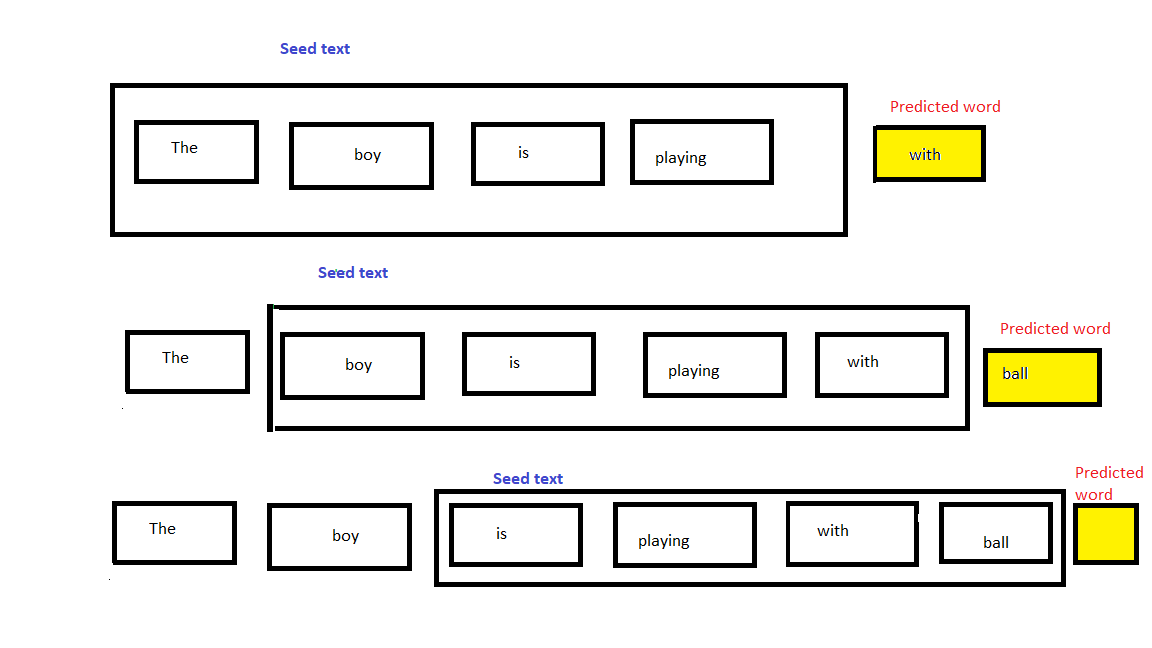

As we can see in above figure, we have to divide our text into a pirticular length of words to do so, we used below cell in which the text is divided into 50 words which will act as a seed text and our model will try to predict the next word that means 51st word.  

In [17]:
Total=50+1
Sentences=[]

for i in range(Total,len(mylist)):
    seq=mylist[i-Total:i]
    line=' '.join(seq)
    Sentences.append(line)
Sentences

['the story is a phase of communicationâ instinctive tendency to signal and transmit feelings ideas respond such expressionsâ communication associated with social complex instincts emotions as indicated by these responses through power sympathy in this curiosity imagination are brought under sway especially indeed psychology reveals how deeply influences controls primitive side',
 'story is a phase of communicationâ instinctive tendency to signal and transmit feelings ideas respond such expressionsâ communication associated with social complex instincts emotions as indicated by these responses through power sympathy in this curiosity imagination are brought under sway especially indeed psychology reveals how deeply influences controls primitive side seen',
 'is a phase of communicationâ instinctive tendency to signal and transmit feelings ideas respond such expressionsâ communication associated with social complex instincts emotions as indicated by these responses through power sympath

Now to develop the LSTM network model we are going to import some other libraries.Numpy library in python is used to create a numpy array.The tensorflow package is imported to use some libraries from it.The tokenizer from keras preprocessing is  allows you to vectorize a given text by transforming each text into either a series of integers or a vector in which a binary coefficient for each token. In this we have used methods such as fit_on_text, sequences_to_texts.

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

We are going to convert all our textual data or our tokens into vectors or numerical values. So, each word in the list will be assigned with the unique number. To update our internal vocabulary based on the list of words we have used the method named fit_on_texts().
Also, to transform these texts to sequence of integers the function known as texts_to_sequences () is used.As a result, it replaces each word in the text with its associated integer value from the word_index dictionary. Hence our sequences will contain the list of numbers or integers that are assigned for each unique word in our data. There are 51 words per line in sequences. 

In [19]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(Sentences)
sequences=tokenizer.texts_to_sequences(Sentences)

Now, here we are creating our input array that is X and our output array that will be y. X will be nothing but first 50 words from the sequences we have created and y will be the last word which is 51st word.  

In [20]:
sequences=np.array(sequences)
X, y = sequences[:, :-1], sequences[:,-1]

In [21]:
vocab_size=len(tokenizer.word_index)+1

In [22]:
len(tokenizer.word_index)

9547

Finally, the output patterns (single characters converted to numbers) must be converted into one hot encoding. 
This allows us to set the network to predict the probability of each of all the characters in the vocabulary (a more user-friendly form) rather than forcing it to anticipate the next character accurately.This is done using to_categorical() function. 

In [23]:
y = to_categorical(y, num_classes=vocab_size)
X.shape[1]

50

In [24]:
vocab=tokenizer.word_index

In [25]:
seq_length=X.shape[1]

In [26]:
Sentences[0]

'the story is a phase of communicationâ instinctive tendency to signal and transmit feelings ideas respond such expressionsâ communication associated with social complex instincts emotions as indicated by these responses through power sympathy in this curiosity imagination are brought under sway especially indeed psychology reveals how deeply influences controls primitive side'

In [27]:
sequences[0]

array([9546, 9544, 9542, 9540, 9538, 9536, 9534, 9532, 9530, 9528, 9526,
       9524, 9522, 9520, 9518, 9516, 9514, 9512, 9510, 9508, 9506, 9504,
       9502, 9500, 9498, 9496, 9494, 9492, 9490, 9488, 9486, 9484, 9482,
       9480, 9478, 9476, 9474, 9472, 9470, 9468, 9466, 9464, 9462, 9460,
       9458, 9456, 9454, 9452, 9450, 9448,    1])

This sequences is therefore now the array of the vector form of our words as shown in the output above.Similarly the vocab variable contains the words and their unique integer values.This is shown in the below cell.

In [28]:
vocab

{'side': 1,
 'seen': 2,
 'animals': 3,
 'calls': 4,
 'their': 5,
 'kind': 6,
 'rush': 7,
 'dogs': 8,
 'men': 9,
 'cries': 10,
 'battle': 11,
 'its': 12,
 'over': 13,
 'shown': 14,
 'swaying': 15,
 'spectator': 16,
 'movements': 17,
 'athlete': 18,
 'his': 19,
 'ejaculations': 20,
 'distress': 21,
 'or': 22,
 'delight': 23,
 'enters': 24,
 'contest': 25,
 'further': 26,
 'so': 27,
 'socially': 28,
 'minded': 29,
 'we': 30,
 'dependent': 31,
 'upon': 32,
 'guidance': 33,
 'that': 34,
 'nowhere': 35,
 'keen': 36,
 'nor': 37,
 'active': 38,
 'life': 39,
 'situation': 40,
 'any': 41,
 'incident': 42,
 'accumulation': 43,
 'incidents': 44,
 'call': 45,
 'plot': 46,
 'experience': 47,
 'an': 48,
 'individual': 49,
 'group': 50,
 'individuals': 51,
 'grips': 52,
 'mind': 53,
 'explains': 54,
 'fascination': 55,
 'gossip': 56,
 'scandal': 57,
 'less': 58,
 'worthy': 59,
 'forms': 60,
 'novel': 61,
 'exalted': 62,
 'drama': 63,
 'same': 64,
 'acted': 65,
 'out': 66,
 'they': 67,
 'all': 68,
 'fe

Now, the vital step comes which is the creation of the neural network using LSTM model.A sequential approach is suited for a simple series of layers including one input tensor and one output tensorfor each layer.Thus we have imported seuential above and used here.The Embedding layer uses spontaneous weights to learn embedding for all the words in the training dataset.It takes 3 parameters at its input namely input length,input dimensions and output dimension.The output dimension=50,the input length will be 50 which will be sequence length and the input dimension will be nothing but size of our vocabulary.

Using keras.add() we have added 2 lstm layers.Here the return sequences are set to true so that it will return the full sequence at the output.The input parameters to this keras.add are are basically the memory units in the LSTM layer which are 100 in our case.Also, return_sequences are set to true so that it will give the entire sequence at the output.

At the final layer the total number of layers or units in final dense layer is the size of vocabulary as we are going to predict the probability for each layer.The reason behind selecting the SoftMax activation function in the last dense layer is that it will convert the vector form of output into the categorical probabilities. 

In [29]:
model_keras=Sequential()
model_keras.add(Embedding(vocab_size,50,input_length=seq_length))
model_keras.add(LSTM(100,return_sequences=True))
model_keras.add(LSTM(100))
model_keras.add(Dense(100,activation='relu'))
model_keras.add(Dense(vocab_size,activation='softmax'))

In [30]:
model_keras.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 50)            477400    
_________________________________________________________________
lstm (LSTM)                  (None, 50, 100)           60400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dense_1 (Dense)              (None, 9548)              964348    
Total params: 1,592,648
Trainable params: 1,592,648
Non-trainable params: 0
_________________________________________________________________


Now the next step is to compile our model.We have used the loss function as the categorical cross entropy. This loss function is used widely in multi-class classification tasks.The optimizer used is adam optimizer in this case.For training deep learning models, Adam is a replacement optimization technique for stochastic gradient descent.

In [31]:
model_keras.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Now we have made our algorithm learn using model.fit method in keras.We have set the batch_size=64 and epochs to 30.We have imported time so that we can keep a track of the time taken for execution. 

In [32]:
import time
start_time = time.time()
model_keras.fit(X,y,batch_size=64,epochs=30)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/30
149/149 [==============================] - 12s 79ms/step - loss: 9.1905 - accuracy: 0.0000e+00
Epoch 2/30
149/149 [==============================] - 11s 76ms/step - loss: 9.1692 - accuracy: 0.0000e+00
Epoch 3/30
149/149 [==============================] - 11s 75ms/step - loss: 9.1645 - accuracy: 0.0000e+00
Epoch 4/30
149/149 [==============================] - 11s 73ms/step - loss: 9.0312 - accuracy: 0.0000e+00
Epoch 5/30
149/149 [==============================] - 11s 72ms/step - loss: 8.7479 - accuracy: 0.0000e+00
Epoch 6/30
149/149 [==============================] - 11s 71ms/step - loss: 8.2306 - accuracy: 4.2119e-04
Epoch 7/30
149/149 [==============================] - 10s 70ms/step - loss: 7.5802 - accuracy: 0.0017
Epoch 8/30
149/149 [==============================] - 10s 70ms/step - loss: 6.7413 - accuracy: 0.0044
Epoch 9/30
149/149 [==============================] - 11s 71ms/step - loss: 5.6844 - accuracy: 0.0195
Epoch 10/30
149/149 [==============================] - 11s

Now we have to make predictions.For that we have given the sentence 0 as the seed text as shown in the below cell.

In [70]:
seed_text=Sentences[0]
seed_text

'the story is a phase of communicationâ instinctive tendency to signal and transmit feelings ideas respond such expressionsâ communication associated with social complex instincts emotions as indicated by these responses through power sympathy in this curiosity imagination are brought under sway especially indeed psychology reveals how deeply influences controls primitive side'

To generate our 51st predicted word we have used below cell in which it takes seed text as a input and by using function tokenizer.texts_to_sequences as a result replaces each word in the text with its associated integer value from the word_index dictionary so that our model can understand the given input and try to predict the next word. 

In [34]:
def generate_text_seq(model_keras,tokenizer,text_seq_length,seed_text,n_words):
    text=[]
    for _ in range(n_words):
        encoded=tokenizer.texts_to_sequences([seed_text])[0]
        encoded=pad_sequences([encoded],maxlen=text_seq_length,truncating='pre')
        y_predict=model_keras.predict_classes(encoded)
        predicted_word=''
        for word,index in tokenizer.word_index.items():
            if index==y_predict:
                predicted_word=word
                break
        seed_text=seed_text+' '+predicted_word
        text.append(predicted_word) 
    return ' '.join(text)        

So below we can observe both form of seed text that are actual text and its encoded format.

In [58]:
print(seed_text)
print('\n')
print(tokenizer.texts_to_sequences([seed_text])[0])

individuals grips mind explains fascination gossip scandal less worthy forms novel exalted drama same acted out they all feed tremendous hunger for insight into unroll curtain on content some hence natural form revealing like may be either serious frivolous carries both functions it pictures expresses phases but itself pleasurable thus telling


[51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101]


## WORD2VEC EMBEDDING

The first case to perform the word2vec method was to install gensim library and then import the word2vec model from it

In [36]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [37]:
mylist1=[mylist]

The parameters that need to be defined for using word2vec are as described below:

1. sentences: It is the input list on which we wants our model to get trained.
2. window: The default window size set by the genism is 5.This means that it will compare 2 words before and after the               target word and the input word itself.
3. min_count: This defines the frequency of words at which they need to be ignored. For instance if min_count=3, the words               that appear less than 3 times in our corpus will be ignored.


In [38]:
import gensim
from gensim.models import Word2Vec
word2vec = Word2Vec(sentences=mylist1, window=10, min_count=1)

C:\Users\sharv\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [39]:
len(vocab)

9547

In [40]:
len(mylist)

9548

The weight matrix is the next stage in the wors2vec approach. For this, we constructed a function called weight matrix( ) that takes our lstm model as input. In this function, we first created a numpy array of zeros that matches to the size of our vocabulary and dimension.

The size of vocabulary would be nothing but the dictionary of all unique words from our text data. Later, using for loop each word is accessed and after getting each word we assign numpy array of zeros to word2vec matrix of that particular word.  At the end, we assign these matrices as embedding vector.
We have created our LSTM model in the same manner as in previous technique but in this case the weights to our neural network is our embedding vector.


In [41]:
DIM=100
def weight_matrix(model):
    weight_matrix=np.zeros((vocab_size,DIM))
    
    for word, i in vocab.items():
        weight_matrix[i]=model.wv[word]
        
    return weight_matrix

In [42]:
embedding_vec=weight_matrix(word2vec)

In [43]:
embedding_vec.shape

(9548, 100)

So, we will now create the LSTM model in the same way as done previous.

In [44]:
model_w2v=Sequential()
model_w2v.add(Embedding(vocab_size,100,weights=[embedding_vec],input_length=50))
model_w2v.add(LSTM(100,return_sequences=True))
model_w2v.add(LSTM(100))
model_w2v.add(Dense(100,activation='relu'))
model_w2v.add(Dense(vocab_size,activation='softmax'))

In [45]:
model_w2v.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 100)           954800    
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 100)           80400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 9548)              964348    
Total params: 2,090,048
Trainable params: 2,090,048
Non-trainable params: 0
_________________________________________________________________


In [46]:
model_w2v.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
import time
start_time = time.time()
model_w2v.fit(X,y,batch_size=64,epochs=30)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/30
149/149 [==============================] - 12s 80ms/step - loss: 9.1905 - accuracy: 0.0000e+00
Epoch 2/30
149/149 [==============================] - 12s 78ms/step - loss: 9.1693 - accuracy: 0.0000e+00
Epoch 3/30
149/149 [==============================] - 12s 78ms/step - loss: 9.1686 - accuracy: 0.0000e+00
Epoch 4/30
149/149 [==============================] - 12s 77ms/step - loss: 9.1243 - accuracy: 0.0000e+00
Epoch 5/30
149/149 [==============================] - 12s 78ms/step - loss: 8.7803 - accuracy: 4.2119e-04
Epoch 6/30
149/149 [==============================] - 12s 79ms/step - loss: 7.9629 - accuracy: 0.0018
Epoch 7/30
149/149 [==============================] - 11s 77ms/step - loss: 6.6550 - accuracy: 0.0108
Epoch 8/30
149/149 [==============================] - 12s 78ms/step - loss: 4.9220 - accuracy: 0.0508
Epoch 9/30
149/149 [==============================] - 12s 79ms/step - loss: 3.4443 - accuracy: 0.1191
Epoch 10/30
149/149 [==============================] - 12s 78m

In [48]:
def generate_text_seq(model_w2v,tokenizer,text_seq_length,seed_text,n_words):
    text=[]
    for _ in range(n_words):
        encoded=tokenizer.texts_to_sequences([seed_text])[0]
        encoded=pad_sequences([encoded],maxlen=text_seq_length,truncating='pre')
        y_predict=model_w2v.predict_classes(encoded)
        predicted_word=''
        for word,index in tokenizer.word_index.items():
            if index==y_predict:
                predicted_word=word
                break
        seed_text=seed_text+' '+predicted_word
        text.append(predicted_word) 
    return ' '.join(text) 

Below are the predictions made using both the methods.

In [71]:
seed_text

'the story is a phase of communicationâ instinctive tendency to signal and transmit feelings ideas respond such expressionsâ communication associated with social complex instincts emotions as indicated by these responses through power sympathy in this curiosity imagination are brought under sway especially indeed psychology reveals how deeply influences controls primitive side'

using keras predicting

In [66]:
generate_text_seq(model_keras,tokenizer,seq_length,seed_text,10)

'seen animals calls their kind rush rush men cries battle'

using word2vec predicting

In [67]:
generate_text_seq(model_w2v,tokenizer,seq_length,seed_text,10)

'seen animals calls their kind rush dogs men cries battle'

# Results

Following observations were made when we experimented with the code by changing different parameter values.

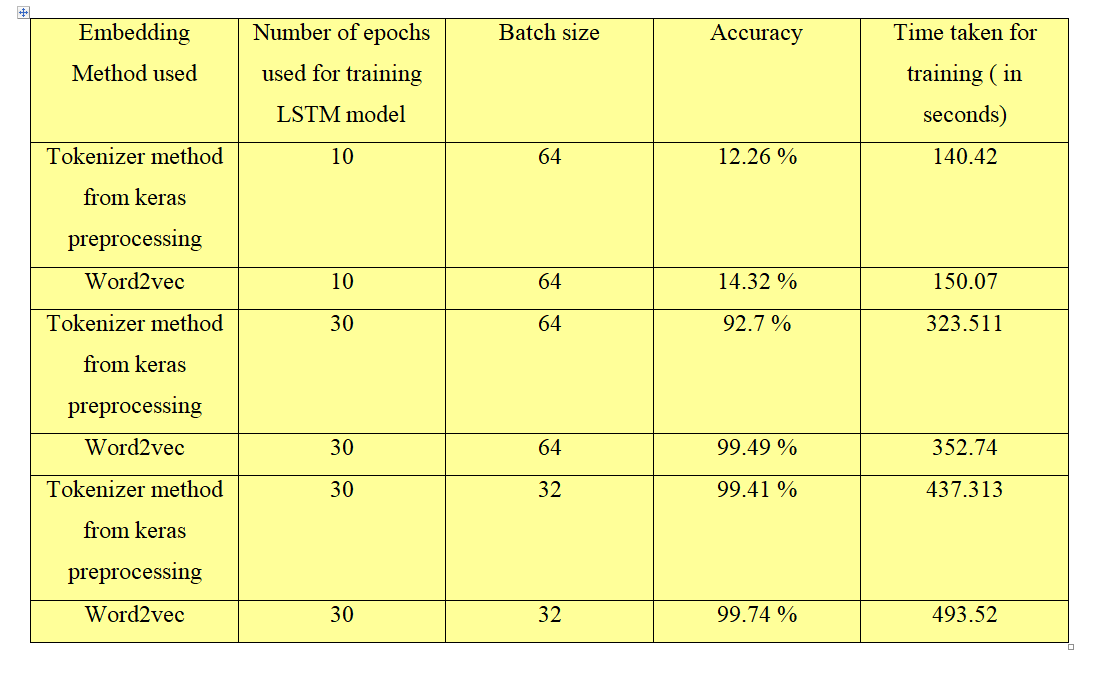

It is observed that good accuracy of about 99 % is achieved reducing the loss and thus making the predictions better, accurate as well as meaningful using LSTM .
As a result, we created a "Automatic Text Generator" to assist in predicting the next word with respect to the input data given to it.